#  Predicting household poverty in Latin America
-------------------------------

### Problem Statement Scenario:
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

### Implementation
Let's start by importing the modules we'll require fot this project.

In [2]:
#Import dependence Library
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None) #It will display all columns in Dataframe

In [4]:
# load train and test datasets
train_data = pd.read_csv('train.csv')  
test_data = pd.read_csv('test.csv')

#### Explore train dataset

In [5]:
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


#### Explore test dataset

In [7]:
test_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [9]:
#shape of data sets
print('train dataset : ',train_data.shape)
print('test dataset : ',test_data.shape)

train dataset :  (9557, 143)
test dataset :  (23856, 142)


#### Identify the target variable in train dataset

In [10]:
target = [col for col in train_data.columns if col not in test_data.columns]

In [11]:
print("{} variable is the Outcome in Datset. ".format(target[0]))

Target variable is the Outcome in Datset. 


### Lets check for any bias in the dataset

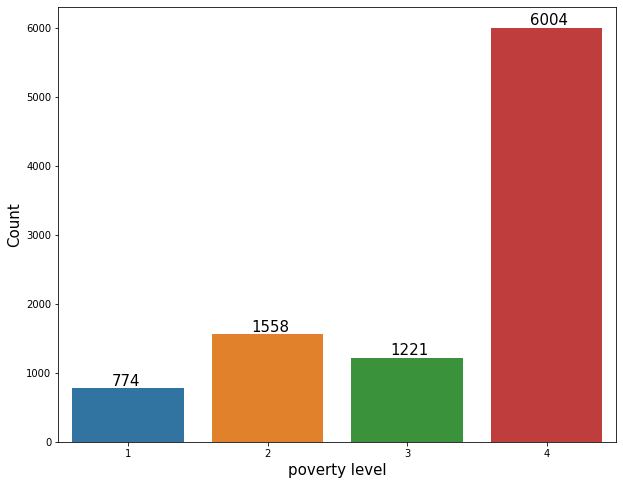

In [50]:
#look at the dataset and plot head of household and Target
plt.figure(figsize=(10,8))
ax = sns.countplot(x=train_data["Target"])
plt.xlabel(xlabel='poverty level' ,fontsize=15)
plt.ylabel(ylabel='Count', fontsize = 15)
for i in ax.patches:
    ax.text(i.get_x()+0.28,i.get_height()+40, str(i.get_height()) ,fontsize=15)

The poverty level distribution (class distribution) is very imbalanced as shown in Fig.
extreme poverty is the smallest count in the train dataset. **The dataset is biased**.

**lets check whether all members of the house have the same poverty level**

In [13]:
#Groupby the idhogar(Household) to get number of unique values by comparing with target variable
poverty_lvl =train_data.groupby('idhogar')['Target'].apply(lambda x: x.nunique())
poverty_lvl.value_counts()

1    2903
2      84
3       1
Name: Target, dtype: int64

In [14]:
#Get the number of household family members with diffrent poverty level
diff_poverty_lvl = poverty_lvl[poverty_lvl!=1]
print("{} Households of family members are having diffrent poverty level".format(diff_poverty_lvl.count()))

85 Households of family members are having diffrent poverty level


85 households are mislabeled with target variable.

**Check for a house without a family head.**             
* "parentesco1" =1 if household head

In [15]:
household_head = train_data[train_data['parentesco1']== 1]
household_head.shape

(2973, 143)

In [16]:
index = train_data.idhogar.value_counts().index
no_household_head = [row for row in index if row not in household_head['idhogar'].unique()]
print('{} Houses are without family head '.format(len(no_household_head)))

15 Houses are without family head 


**Set poverty level of the members and the head of the house within a family.**

In [17]:
# Lets correct the mislabeled target value with true value
for household in diff_poverty_lvl.index:
    # Find the correct label (for the head of household)
    true_target = int(train_data[(train_data['idhogar'] == household) & (train_data['parentesco1'] == 1.0)]['Target'])
    
    # Set the correct label for all members in the household
    train_data.loc[train_data['idhogar'] == household, 'Target'] = true_target

    
#verify whether all members of house are having same poverty level or not
poverty_lvl =train_data.groupby('idhogar')['Target'].apply(lambda x: x.nunique())
#Get the number of household family members with diffrent poverty level
diff_poverty_lvl = poverty_lvl[poverty_lvl!=1]
print("{} Households of family members are having diffrent poverty level".format(diff_poverty_lvl.count()))

0 Households of family members are having diffrent poverty level


## Data Cleaning

In [18]:
#check for object data types
train_data.dtypes[train_data.dtypes == np.object]

Id            object
idhogar       object
dependency    object
edjefe        object
edjefa        object
dtype: object

Notes on object Variables:
1. Id - a unique identifier for each row.
2. idhogar - this is a unique identifier for each household.
3. dependency - Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number                of member of household between 19 and 64)
4. edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
5. edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

In [19]:
# check for unique values count in 'dependency' column. 
train_data.dependency.value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
.80000001      18
3.5            18
2.25           13
.71428573      12
1.2            11
1.75           11
.22222222      11
.83333331      11
.2857143        9
1.6666666       8
.60000002       8
.16666667       7
6               7
Name: dependency, dtype: int64

In [20]:
train_data.edjefe.value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [21]:
train_data.edjefa.value_counts()

no     6230
6       947
11      399
9       237
8       217
15      188
7       179
5       176
3       152
4       136
14      120
16      113
10       96
2        84
17       76
12       72
yes      69
13       52
21        5
19        4
18        3
20        2
Name: edjefa, dtype: int64

#### Handling the categorical variables:
* For these 3 object variables 'dependency', 'edjefe', 'edjefa'. it seems “yes” = 1 and “no” = 0. We can correct the variables using a mapping

In [22]:
mapping = {'yes':1, 'no':0}

##Mapping for training dataset
train_data['dependency'] = train_data['dependency'].replace(mapping).astype('float')
train_data['edjefe'] = train_data.edjefe.replace(mapping).astype('float')
train_data['edjefa'] = train_data['edjefa'].replace(mapping).astype('int64')

##Mapping for training dataset
test_data['dependency'] = test_data['dependency'].replace(mapping).astype('float')
test_data['edjefe'] = test_data.edjefe.replace(mapping).astype('float')
test_data['edjefa'] = test_data['edjefa'].replace(mapping).astype('int64')

In [23]:
#Since ID variables are not useful to predict the target variable, So we drop those columns from train and test dataset
ID = ['Id','idhogar']
train_data = train_data.drop(ID,axis=1)
test_data = test_data.drop(ID,axis=1)

In [24]:
#Check if there any Object variable
print('Object types in train datset:',train_data.dtypes[train_data.dtypes == np.object])
print("Object types in test dataset: ", test_data.dtypes[test_data.dtypes == np.object])

Object types in train datset: Series([], dtype: object)
Object types in test dataset:  Series([], dtype: object)


In [25]:
#check for null values in train data
print("Null value columns and count:\n", train_data.isna().sum()[train_data.isna().any()])

Null value columns and count:
 v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64


In [26]:
#check for null values in test data
test_data.isna().sum()[test_data.isna().any()]

v2a1         17403
v18q1        18126
rez_esc      19653
meaneduc        31
SQBmeaned       31
dtype: int64

**Lets fix the columns with null values:**
* v2a1 : Monthly rent payment(v2a1) column is related to cloumns like "own and fully paid house(tipovivi1)" , "tipovivi4(precarious situation)"  and "tipovivi5(assigned,  borrowed)".

In [27]:
train_data['v2a1'].isna().sum()

6860

In [28]:
#Get null values by considering the "v2a1" column
data = train_data[(train_data['v2a1'].isna())& ((train_data['tipovivi1'] == 1)|(train_data['tipovivi4'] == 0)
                                                |(train_data['tipovivi5'] == 0))]
rent_due = data[['v2a1','tipovivi1','tipovivi4','tipovivi5']]
rent_due.count()

v2a1            0
tipovivi1    6860
tipovivi4    6860
tipovivi5    6860
dtype: int64

In [29]:
rent_due

,v2a1,tipovivi1,tipovivi4,tipovivi5
2,NaN,1,0,0
13,NaN,1,0,0
14,NaN,1,0,0
26,NaN,1,0,0
32,NaN,1,0,0
...,...,...,...,...
9542,NaN,1,0,0
9543,NaN,1,0,0
9544,NaN,1,0,0
9550,NaN,1,0,0


In [40]:
df = pd.melt(rent_due)
df.value_counts()

variable   value
tipovivi4  0.0      6697
tipovivi5  0.0      6074
tipovivi1  1.0      5911
           0.0       949
tipovivi5  1.0       786
tipovivi4  1.0       163
dtype: int64

Text(0, 0.5, 'Count')

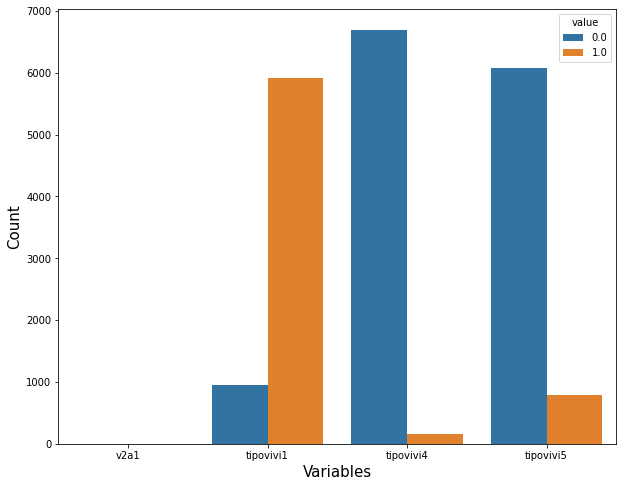

In [52]:
plt.figure(figsize=(10,8))
df = pd.melt(rent_due)
sns.countplot(data=df.loc[df['value']!="NO"], x='variable', hue='value')
plt.xlabel(xlabel='Variables' ,fontsize=15)
plt.ylabel(ylabel='Count', fontsize = 15)

Interpretation and action : We can see in above plot that all 6860 null values. That means One who have a "own and fully paid house(tipovivi1)" or in precarious situation(tipovivi4) or tipovivi5(assigned or borrowed) are not paying the "rent of house(v2a1)". So we can fill the null values for v2a1 with 0.

In [30]:
#Fill nan values with 0 for v2a1 feature in both train and test data
for df in [train_data,test_data]:
    df['v2a1'].fillna(value=0, inplace=True)
print('Total {} null values present in v2a1 column.'.format(train_data.v2a1.isna().sum()))

Total 0 null values present in v2a1 column.


 * v18q1 : v18q1(number of tablets household owns) column is related to v18q(owns a tablet) column.

In [31]:
data = train_data[(train_data.v18q1.isna()) & (train_data.v18q == 0)]
no_tablets = data[['v18q1','v18q']]
no_tablets.count()

v18q1       0
v18q     7342
dtype: int64

In [32]:
no_tablets

,v18q1,v18q
0,NaN,0
2,NaN,0
7,NaN,0
8,NaN,0
9,NaN,0
...,...,...
9552,NaN,0
9553,NaN,0
9554,NaN,0
9555,NaN,0


Interpretation and action : Looking at the above data it makes sense that when owns a tablet column(v18q) is 0, there will be no number of tablets(v18q1) household owns. So we can fill the null values for v2a1 with 0.

In [33]:
# Replacing null values in number of tablets household owns(v18q1) with 0 value.
for df in [train_data,test_data]:
    df['v18q1'].fillna(value=0, inplace=True)
train_data.v18q1.isna().sum()

0

* rez_esc : will drop rez_esc(Years behind in school) column, Because it have more than 50% of null values and replacing it may effect the model badly

In [34]:
# Drop "rez_esc" column in both train test dataset
train_data = train_data.drop(['rez_esc'],axis=1)
test_data = test_data.drop(['rez_esc'],axis=1)

* meaneduc & SQBmeaned : meaneduc(average years of education for adults (18+)) and SQBmeaned(square of the mean years of education of adults (>=18) in the household) is related to instlevel1(no level of education)

In [35]:
data = train_data[(train_data.meaneduc.isnull()) & (train_data['instlevel1']==0)]
data[['instlevel1','meaneduc','SQBmeaned']]

,instlevel1,meaneduc,SQBmeaned
1291,0,NaN,NaN
1840,0,NaN,NaN
1841,0,NaN,NaN
2049,0,NaN,NaN
2050,0,NaN,NaN


Interpretation and action : We can see here all 5 nan values of "meaneduc" and "SQBmeaned" are having 0 level of Education. Hence we replace the null value with 0.

In [36]:
# Replacing null values in "meaneduc" and "SQBmeaned" with 0 value.
for df in [train_data,test_data]:
    df['meaneduc'].fillna(value=0, inplace=True)
    df['SQBmeaned'].fillna(value=0, inplace=True)
    
train_data.v18q1.isna().sum()

0

In [37]:
print('Null values in train datasets: ',train_data.isna().sum()[train_data.isna().any()])

Null values in train datasets:  Series([], dtype: int64)


In [38]:
print('Null values in test datasets: ',test_data.isna().sum()[test_data.isna().any()])

Null values in test datasets:  Series([], dtype: int64)


**Check for Zero variance columns**

In [39]:
zero_var = train_data.loc[:,(train_data != train_data.iloc[0]).any()]
zero_var = [col for col in train_data.columns if col not in zero_var.columns]
print('Zero Variance Columns: ',zero_var)

Zero Variance Columns:  ['elimbasu5']


Zero variance column are removed from dataset, Because those columns are not use full while pridicting the target variable.

Here: 
* elimbasu5 : rubbish disposal mainly by throwing in river,  creek or sea"

In [40]:
# Drop 'elimbasu5' column in both train test dataset.
train_data = train_data.drop("elimbasu5", axis=1)
test_data = test_data.drop("elimbasu5", axis=1)

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 139 entries, v2a1 to Target
dtypes: float64(9), int64(130)
memory usage: 10.1 MB


#### Lets check for Dublicate values
In this case Dublicate values are squared values. All such columns have been removed from the data set as they provide no additional information to the model
* SQBescolari:  escolari squared
* SQBage:  age squared
* SQBhogar_total:  hogar_total squared
* SQBedjefe:  edjefe squared
* SQBhogar_nin:  hogar_nin squared
* SQBovercrowding:  overcrowding squared
* SQBdependency:  dependency squared
* SQBmeaned:  square of the mean years of education of adults (>=18) in the household
* agesq:  Age squared

In [1]:
# Get the squared value columns 
sqr_col = ['SQBescolari','SQBage','SQBhogar_total','SQBedjefe','SQBhogar_nin','SQBovercrowding','SQBdependency',
           'SQBmeaned','agesq']

In [43]:
#Drop the squared Columns in both Train and Test Datasets
for df in [train_data, test_data]:
    df.drop(columns=sqr_col,inplace=True)
train_data.shape,test_data.shape

((9557, 130), (23856, 129))

In [44]:
train_data.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
0,190000.0,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.0,10.0,0,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8.0,12.0,0,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,4
2,0.0,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8.0,0.0,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,4,1.0,11.0,0,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,4,1.0,11.0,0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,4


Split the train data into train and test data know model accuarcy

In [45]:
#Creat X_data and y_data using train data
X_data = train_data.drop('Target',1)
y_data = train_data["Target"]
X_data.shape,y_data.shape

((9557, 129), (9557,))

In [46]:
#Spliting the dataset
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=50)
X_train.shape, y_train.shape

((7645, 129), (7645,))

###  Feature Selection - With Correlation
In this step we will be removing the features which are highly correlated 

In [47]:
#To avoid overfitting we need to perform correlation only on X_train and y_train
cor_matrixx = X_train.corr()
cor_matrixx

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age
v2a1,1.000000,-0.022543,0.106290,-0.029021,0.017606,0.060551,0.165977,0.189221,0.021343,-0.054413,-0.035227,0.018438,0.021850,0.027486,0.026195,-0.024994,-0.004867,-0.014027,-0.012807,0.141015,-0.014027,0.167824,-0.066948,-0.080517,-0.038712,-0.080422,-0.025469,-0.013811,-0.002085,0.164132,-0.140504,-0.013604,-0.015212,-0.052893,-0.038108,-0.011144,0.051993,-0.017607,-0.017347,0.200137,0.058992,-0.053818,-0.024554,0.080229,-0.008328,-0.020980,-0.075699,-0.019478,0.106892,-0.083930,-0.050324,-0.016661,-0.011928,0.125655,-0.084366,-0.092559,0.134129,-0.063978,-0.112296,-0.011643,-0.015212,-0.090352,-0.109631,0.159285,-0.076909,-0.091634,0.136166,-0.088152,-0.101434,0.147805,-0.046537,-0.008873,0.008873,0.029564,0.013882,0.026851,-0.013592,-0.040728,-0.054956,-0.009626,-0.006172,0.022611,0.003232,-0.007145,-0.012644,-0.050468,-0.000891,0.001218,0.008710,0.019875,0.000612,0.036671,0.026877,-0.052937,-0.143537,-0.014027,-0.074497,0.191047,0.065040,0.278431,0.010880,-0.070520,-0.090820,-0.013183,-0.004233,0.000058,0.027898,0.134410,0.136292,0.042597,-0.045639,-0.536460,0.494194,0.400195,-0.054849,-0.126506,0.132924,0.025893,0.054916,0.059934,0.167079,-0.028466,-0.016890,-0.083279,-0.094759,-0.069958,0.146891,-0.146891,-0.089705
hacdor,-0.022543,1.000000,-0.232371,0.626607,-0.192339,-0.104869,-0.082541,-0.076681,0.230805,0.052628,0.178595,0.276167,0.141013,0.267570,0.334247,0.129478,0.302003,0.302502,0.341743,-0.115105,0.302502,-0.122876,0.055173,-0.026837,0.138472,0.083245,0.145626,-0.008536,-0.007564,-0.170781,0.078790,-0.006450,0.087198,0.223987,0.058178,-0.043512,-0.025797,-0.011183,-0.008225,-0.170587,-0.057758,0.064486,-0.011641,0.014388,-0.003948,-0.009947,-0.011848,0.103357,-0.010733,0.002877,-0.024627,-0.009947,-0.009126,-0.072565,0.051332,0.050852,-0.030206,-0.010996,0.043232,-0.006841,-0.007212,0.191145,0.051784,-0.166282,0.155584,0.045371,-0.146848,0.250085,0.034151,-0.188602,-0.018843,-0.006537,0.006537,0.096145,0.053508,-0.081880,-0.035953,0.001984,-0.025519,-0.008837,-0.054768,-0.027660,0.015511,0.044944,0.009165,0.076809,-0.006431,-0.009408,-0.004716,0.000539,0.031892,0.037095,0.323682,0.080716,-0.051167,0.302502,0.072164,-0.086662,-0.012053,-0.099020,0.069697,0.053913,-0.003290,-0.001614,-0.041997,-0.015653,-0.003006,-0.067667,-0.023855,-0.212567,0.668439,-0.065970,-0.066643,0.077174,0.138884,0.016683,-0.067220,-0.081468,-0.061883,-0.009500,-0.040355,0.014499,0.025307,-0.003285,0.036328,-0.000533,0.032445,-0.032445,-0.115379
rooms,0.106290,-0.232371,1.000000,-0.213488,0.133285,0.134691,0.263716,0.285026,-0.070069,0.272752,0.197798,-0.025092,0.248919,0.178211,-0.062468,0.358073,0.253967,0.248600,0.264179,0.214183,0.248600,0.256203,-0.051971,-0.145633,-0.099907,-0.114564,-0.066969,-0.002682,-0.022262,0.268

<AxesSubplot:>

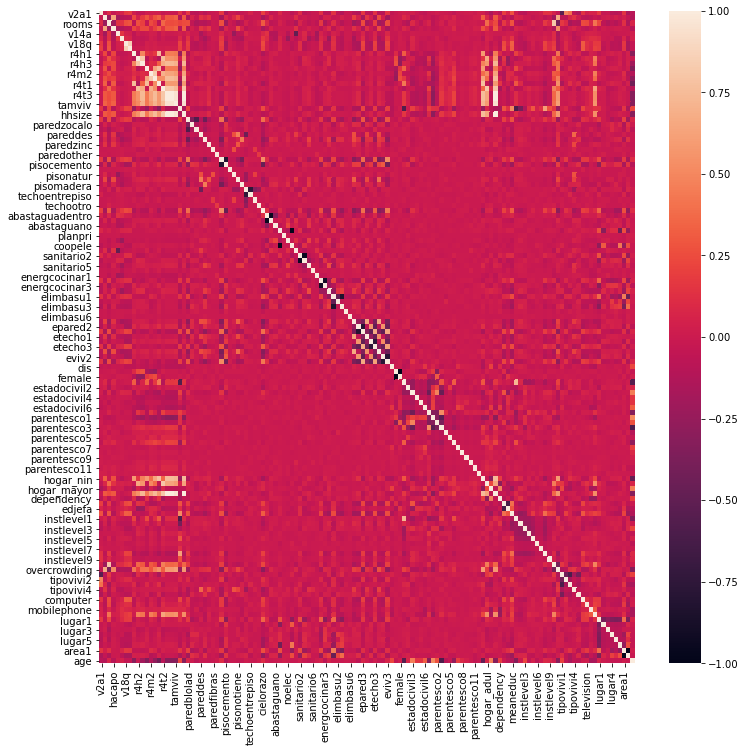

In [48]:
# Plot the correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(data=cor_matrixx)

* If 2 variables are highly correlated, keeping only one variable will reduce dimensionality without much loss of information.
* Which variable has the higher correlation coefficient with target variable will be kept and other one will be dropped.

In [49]:
# Creating a function to select highly correlated features.
# And with in those two features which variable has a low correlation with target feature, Its going to add in "col_corr" list.

def correlation(dataset,threshold,target):
    col_corr = set()  #Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                
                #Store both features(column and index) name, which has highly correlated with each other
                cols = [corr_matrix.columns[i],corr_matrix.columns[j]]
                
                #Apply condition to retrive feature which has low correlated  with target variable
                if (abs(dataset[cols[0]].corr(target))) < (abs(dataset[cols[1]].corr(target))):
                    col_corr.add(cols[0])
                else:col_corr.add(cols[1])
                    
    return col_corr

In [50]:
#Call the 'correlation' function by assigning arguments to it 
corr_features = correlation(X_train,0.95,y_train)

#Convert corr_features set to list
corr_features = list(corr_features)
corr_features

['male', 'coopele', 'hhsize', 'tamhog', 'area1', 'r4t3']

In [51]:
print('There are {} features which are highly correlated with other independent features.'.format(len(corr_features)))

There are 6 features which are highly correlated with other independent features.


In [52]:
#lets drop those columns in both train dataset and test dataset
for df in [X_train,X_test,test_data]:
    df.drop(corr_features,axis=1)

In [53]:
X_train.shape,X_test.shape,test_data.shape

((7645, 129), (1912, 129), (23856, 129))

#### Dealing with Imbalanced Dataset:
* SMOTE method for balancing data: It creates artificial data points for minority classes to balance dataset.

In [54]:
# We need to apply the SMOTE method only on training dataset to prevent from model overfitting
# Define SMOTE method
oversample = SMOTE()
# transform the dataset
sm_X_train, sm_y_train = oversample.fit_resample(X_train, y_train)
X_train.shape,y_train.shape

((7645, 129), (7645,))

Text(0.5, 1.0, 'Train Dataset')

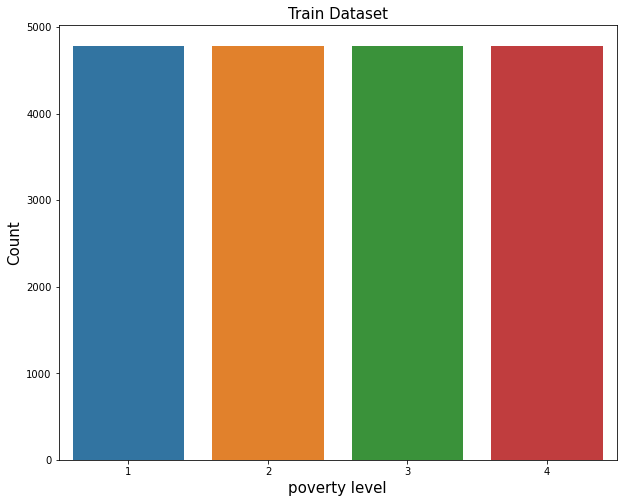

In [55]:
# summarize distribution for Target variable
plt.figure(figsize=(10,8))
ax = sns.countplot(x=sm_y_train)
plt.xlabel(xlabel='poverty level' ,fontsize=15)
plt.ylabel(ylabel='Count', fontsize = 15)
plt.title("Train Dataset", fontsize=15)

In [56]:
print("shape of Train_data set before applying SMOTE: {} \nshape of Train_data set after applying SMOTE: {}"
     .format(X_train.shape,sm_X_train.shape))

shape of Train_data set before applying SMOTE: (7645, 129) 
shape of Train_data set after applying SMOTE: (19136, 129)


### Model creation using Random Forest Classifier 

In [57]:
#Define the RandomForestClassifier Model
rf_model=RandomForestClassifier(n_estimators=100,criterion='entropy',
                             random_state=50)
#fit the model into train data
rf_model.fit(sm_X_train,sm_y_train)

#Prediction for X_test data 
y_pred = rf_model.predict(X_test)

In [58]:
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score 0.9607740585774058


In [59]:
print('Confustion matrix: \n {}'.format(confusion_matrix(y_test,y_pred)))

Confustion matrix: 
 [[ 136    3    2    6]
 [   0  286    5   18]
 [   1    4  210   21]
 [   1    5    9 1205]]


In [60]:
print("Classification report:\n{}".format(classification_report(y_test,y_pred)))

Classification report:
              precision    recall  f1-score   support

           1       0.99      0.93      0.95       147
           2       0.96      0.93      0.94       309
           3       0.93      0.89      0.91       236
           4       0.96      0.99      0.98      1220

    accuracy                           0.96      1912
   macro avg       0.96      0.93      0.95      1912
weighted avg       0.96      0.96      0.96      1912



### Model creation using Randomized Search CV

In [61]:
# Create the random grid
parameters_grid = {'n_estimators': [100,150,200,250,300],
               'max_features': ['auto', 'sqrt','log2'],
               'max_depth': [20,40,80,150,200,250],
               'min_samples_split': [4, 10, 15,20],
              'criterion':['entropy','gini']}
print(parameters_grid)

{'n_estimators': [100, 150, 200, 250, 300], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [20, 40, 80, 150, 200, 250], 'min_samples_split': [4, 10, 15, 20], 'criterion': ['entropy', 'gini']}


In [62]:
# Will use random forest classifier model as estimator for randomized search cv
#Instantiating Random forest classifier model
rand_fore=RandomForestClassifier()

#Instantiating Randomized Search CV model
rs_cv_model=RandomizedSearchCV(estimator=rand_fore,param_distributions=parameters_grid,n_iter=100,cv=5,
                               random_state=100,n_jobs=-1)
# fit the randomized model
rs_cv_model.fit(sm_X_train,sm_y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [20, 40, 80, 150, 200,
                                                      250],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [4, 10, 15, 20],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   random_state=100)

In [63]:
#To know best parameters selected by Randomized Search CV
rs_cv_model.best_params_

{'n_estimators': 250,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 80,
 'criterion': 'gini'}

In [64]:
#Define Random forest model with best parameters
rand_forest = RandomForestClassifier(criterion='entropy', max_depth=250, max_features='sqrt',
                       min_samples_split=4, random_state=20)
#Fit the training data
rand_forest.fit(sm_X_train,sm_y_train)

RandomForestClassifier(criterion='entropy', max_depth=250, max_features='sqrt',
                       min_samples_split=4, random_state=20)

In [65]:
# Prediction for X_test data
y_pred=rand_forest.predict(X_test)

#Accuracy score
print("Accuracy Score using Randomized Search CV : {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score using Randomized Search CV : 0.9534518828451883


In [67]:
#Confustion matrix
print('Confustion matrix: \n{}'.format(confusion_matrix(y_test,y_pred)))

Confustion matrix: 
[[ 132    4    2    9]
 [   0  284    2   23]
 [   0    3  206   27]
 [   2    9    8 1201]]


In [68]:
print("Classification report:\n {}".format(classification_report(y_test,y_pred)))

Classification report:
               precision    recall  f1-score   support

           1       0.99      0.90      0.94       147
           2       0.95      0.92      0.93       309
           3       0.94      0.87      0.91       236
           4       0.95      0.98      0.97      1220

    accuracy                           0.95      1912
   macro avg       0.96      0.92      0.94      1912
weighted avg       0.95      0.95      0.95      1912



### Conclusion:                                                                                                   
* By Comparing both RandomForestClassifier and RandomizedSearchCV models, RandomForestClassifier has the highest accuracy     score of 95.60%.
* Will use RandomForestClassifier model to predict the Test data.

### Prediction for Test Data

In [69]:
# Predicting for Test dataset using RandomForestClassifier model
test_pred = rf_model.predict(test_data)

In [70]:
#Get the Value counts for predicted target feature
Target = np.array(np.unique(test_pred,return_counts=True)).T
print('Target value counts for Test dataset:\n {}'.format(Target))

Target value counts for Test dataset:
 [[    1  1178]
 [    2  3896]
 [    3  1444]
 [    4 17338]]
